In [38]:
# ładowanie bibliotek
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

from sklearn import datasets
iris = datasets.load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris.target #Iris-Setosa 0
                #- Iris-Versicolour 1
                #- Iris-Virginica 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
iris['new_target']=(iris['target']>1)*1 #Nowy target - rozróżnienie czy dana próbka jest z gatunku **virginica** czy nie, jak jest to przypisuje jej 1, reszta 0

In [14]:
iris['new_target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# Klasyfikacja binarna
# Rozpoznawanie czy dana próbka jest z gatunku virginica.

In [19]:
#podział zbioru na część testową i treningową
X_train, X_test, y_train, y_test = train_test_split( iris["data"], 
    iris["new_target"],
    test_size=0.33,
    random_state=42)

In [20]:
#tworzenie modelu i trenowanie na danych treningowych
model=LogisticRegression(random_state=42)

In [21]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [22]:
#predykcja na zbiorze testowym
y_pred=model.predict(X_test)

In [23]:
#zobaczmy jak model jest dopasowany do danych treningowych
y_fit_train=model.predict(X_train)

In [24]:
model.predict_proba(X_test) #Szacunki prawdopodobieństwa.

array([[7.96755454e-01, 2.03244546e-01],
       [9.99983143e-01, 1.68574882e-05],
       [2.39582907e-03, 9.97604171e-01],
       [7.80922675e-01, 2.19077325e-01],
       [7.10846078e-01, 2.89153922e-01],
       [9.99984297e-01, 1.57030422e-05],
       [9.78747901e-01, 2.12520987e-02],
       [1.76616781e-01, 8.23383219e-01],
       [7.43932837e-01, 2.56067163e-01],
       [9.62981398e-01, 3.70186016e-02],
       [2.68294554e-01, 7.31705446e-01],
       [9.99990926e-01, 9.07413839e-06],
       [9.99994058e-01, 5.94171025e-06],
       [9.99989057e-01, 1.09429325e-05],
       [9.99988001e-01, 1.19985660e-05],
       [6.88908069e-01, 3.11091931e-01],
       [3.76243674e-02, 9.62375633e-01],
       [9.65543623e-01, 3.44563773e-02],
       [8.26042208e-01, 1.73957792e-01],
       [5.51950860e-02, 9.44804914e-01],
       [9.99982471e-01, 1.75287318e-05],
       [4.30969796e-01, 5.69030204e-01],
       [9.99977497e-01, 2.25030597e-05],
       [6.67599345e-02, 9.33240066e-01],
       [2.485757

In [25]:
y_pred #predykcja na zbiorze testowym

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1])

In [26]:
#sprawdzam metryki predycji
cm=confusion_matrix(y_test,y_pred)

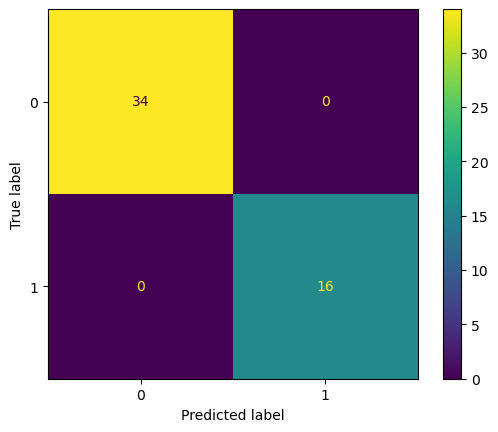

In [27]:
cm_display=ConfusionMatrixDisplay(cm).plot()

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [32]:
pred_test_proba= model.predict_proba(X_test)[:,1] #predykcja na zbiorze testowym

In [33]:
fpr_test, tpr_test, _ = roc_curve(y_test, pred_test_proba)

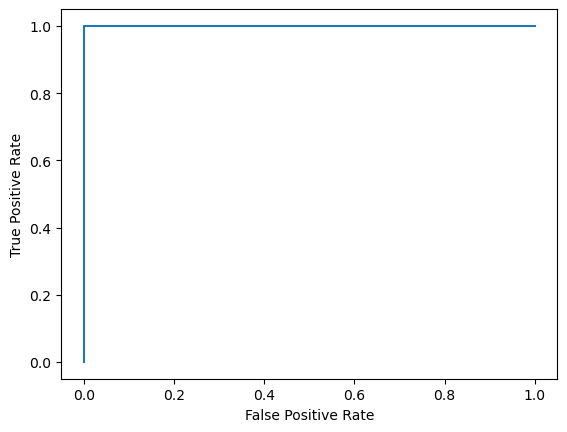

In [35]:
roc_display=RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot() #Podczas korzystania z y_pred, krzywa ROC będzie miała tylko „1” i „0” do obliczenia zmiennych, więc krzywa ROC będzie przybliżona. Aby uniknąć tego efektu i uzyskać dokładniejsze wyniki, zaleca się użycie y_probai uzyskanie prawdopodobieństw klasy „1” przy obliczaniu AUC ROC:

In [41]:
wynik = roc_auc_score(y_test, pred_test_proba) 

In [42]:
wynik

1.0

In [ ]:
#Klasyfikacja binarna - gatunek **versicolour**


In [43]:
iris.target #Iris-Setosa 0
                #- Iris-Versicolour 1
                #- Iris-Virginica 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
iris['new_target2']=(iris['target']==1)*1

In [70]:
iris['new_target2']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
# Klasyfikacja binarna
# Rozpoznawanie czy dana próbka jest z gatunku versicolour

In [72]:
#podział zbioru na część testową i treningową
X_train2, X_test2, y_train2, y_test2 = train_test_split( iris["data"], 
    iris["new_target2"],
    test_size=0.33,
    random_state=42)

In [73]:
#tworzenie modelu i trenowanie na danych treningowych
model=LogisticRegression(random_state=42)

In [74]:
model.fit(X_train2,y_train2)

LogisticRegression(random_state=42)

In [75]:
#predykcja na zbiorze testowym
y_pred=model.predict(X_test2)

In [76]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0])

In [77]:
X_train2.shape

(100, 4)

In [78]:
#zobaczmy jak model jest dopasowany do danych treningowych
y_fit_train=model.predict(X_train2)

In [79]:
y_fit_train

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [80]:
model.predict_proba(X_test2) #Szacunki prawdopodobieństwa.

array([[0.460219  , 0.539781  ],
       [0.94372943, 0.05627057],
       [0.41352481, 0.58647519],
       [0.60996337, 0.39003663],
       [0.55261902, 0.44738098],
       [0.8920805 , 0.1079195 ],
       [0.66608123, 0.33391877],
       [0.83008612, 0.16991388],
       [0.2788058 , 0.7211942 ],
       [0.51133193, 0.48866807],
       [0.7957162 , 0.2042838 ],
       [0.69790156, 0.30209844],
       [0.90734863, 0.09265137],
       [0.73411478, 0.26588522],
       [0.93980451, 0.06019549],
       [0.79513784, 0.20486216],
       [0.66666192, 0.33333808],
       [0.36807517, 0.63192483],
       [0.48410707, 0.51589293],
       [0.59144078, 0.40855922],
       [0.76756058, 0.23243942],
       [0.67589246, 0.32410754],
       [0.87152586, 0.12847414],
       [0.56688748, 0.43311252],
       [0.9043407 , 0.0956593 ],
       [0.77662505, 0.22337495],
       [0.33423029, 0.66576971],
       [0.77696063, 0.22303937],
       [0.73862766, 0.26137234],
       [0.73473079, 0.26526921],
       [0.

In [82]:
#sprawdzam metryki predycji
cm2=confusion_matrix(y_test2,y_pred)

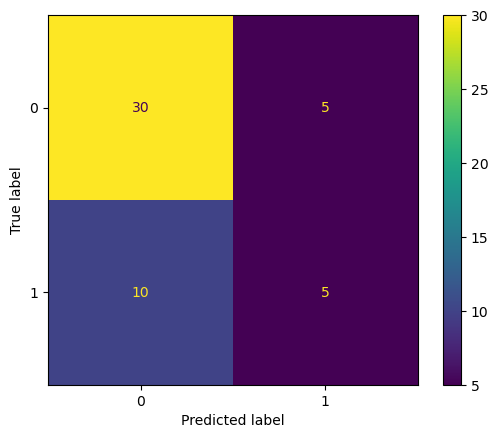

In [84]:
cm_display2=ConfusionMatrixDisplay(cm2).plot()

In [86]:
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.50      0.33      0.40        15

    accuracy                           0.70        50
   macro avg       0.62      0.60      0.60        50
weighted avg       0.68      0.70      0.68        50



In [88]:
pred_test_proba2=model.predict_proba(X_test2)[:,1] #predykcja na zbiorze testowym

In [90]:
fpr_test2,tpr_test2,_=roc_curve(y_test2,pred_test_proba2)

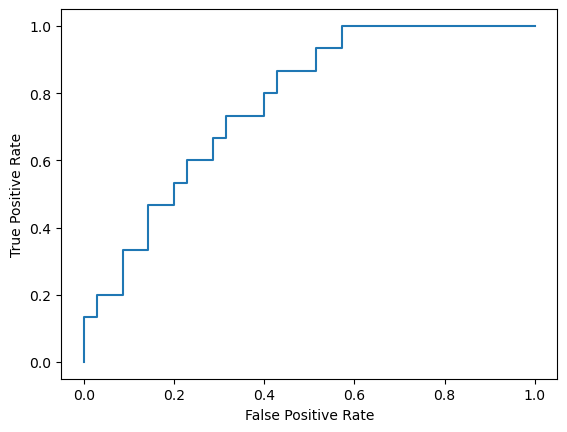

In [91]:
roc_display2=RocCurveDisplay(fpr=fpr_test2, tpr=tpr_test2).plot()

In [92]:
wynik2 = roc_auc_score(y_test2, pred_test_proba2) 

In [93]:
wynik2

0.7714285714285714

In [94]:
from sklearn import metrics


In [96]:
metrics.accuracy_score(y_test2,y_pred)

0.7

In [97]:
metrics.precision_score(y_test2,y_pred)

0.5

In [98]:
metrics.recall_score(y_test2,y_pred)

0.3333333333333333

In [ ]:
Dla gatunku virginica regresja logistyczna okazała się dobrym modelem predykcyjnym. Należy jednak pamiętać, że wysokie wyniki metryk wynikają z niewielkiego zbioru próbek - w rzeczywistośći model nie będzie miał 100% precyzji.

Dla gatunku versicolour regresja logistyczna daje gorsze wyniki, co może sugerować, że nie jest najlepszym modelem predykcji dla tego problemu.